# <span style="color:blue"><회사의 중장기 인력구조 예측, 분석, 시각화 하기></span>

## 분석 목표 : 회사 조직 내 인력구조의 흐름 파악하기 (MZ 세대 비율 파악하기)

### 1) 데이터 불러오기

In [1]:
import pandas as pd

df = pd.read_excel("C:/Users/katenam/DataDrivenReport/population.xlsx")
df

,y_birth,y_enter,y_retire,sex
0,1965.0,2021,NaN,남자
1,1966.0,1992,NaN,남자
2,1973.0,1998,NaN,남자
3,1982.0,2008,NaN,남자
4,1987.0,2013,NaN,남자
...,...,...,...,...
76878,1971.0,1995,2021.0,남자
76879,1988.0,2015,2021.0,남자
76880,1962.0,1992,2021.0,남자
76881,1969.0,1993,2021.0,남자


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76883 entries, 0 to 76882
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   y_birth   76882 non-null  float64
 1   y_enter   76883 non-null  int64  
 2   y_retire  52899 non-null  float64
 3   sex       76883 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 2.3+ MB


- #### 총 76883개 행으로 이뤄져 있고 5개의 열(index, 생년월일, 입사 연도, 퇴직 연도, 성별)으로 이루어져 있다.

### 2) EDA

In [3]:
df.isnull().sum()

y_birth         1
y_enter         0
y_retire    23984
sex             0
dtype: int64

- #### 퇴직 연도(y_retire)의 경우는 현재 회사를 다니고 있는 직원을 의미하기 때문에 그대로 둔다.
- #### 출생 연도(y_birth)에서 1개의 결측치가 확인됐고 이 경우에는 해당 행을 삭제해준다.

In [4]:
df[df['y_birth'].isnull()]

,y_birth,y_enter,y_retire,sex
34606,NaN,1983,1991.0,여자


In [5]:
df.dropna(subset=['y_birth'], inplace=True)

- #### 그 다음으로는 이상치 처리를 위해 전체 데이터의 기술통계를 확인해 본다.

In [6]:
df.describe()

,y_birth,y_enter,y_retire
count,76882.000000,76882.000000,52898.000000
mean,1962.797794,1988.927317,1998.439695
std,17.860491,16.274265,10.726348
min,1900.000000,1940.000000,1965.000000
25%,1952.000000,1978.000000,1993.000000
50%,1963.000000,1987.000000,2001.000000
75%,1973.000000,1997.000000,2001.000000
max,2003.000000,2021.000000,2021.000000


In [18]:
1998.439695-10.726348*3

1966.260651

- #### 평균(mean)에서 표준편차(std)에 3을 곱한 후 더한 값이 최댓값보다 크거나 평균에서 표준편차에 3을 곱한 후 뺀 값이 최솟값보다 작으면 이상치 의심

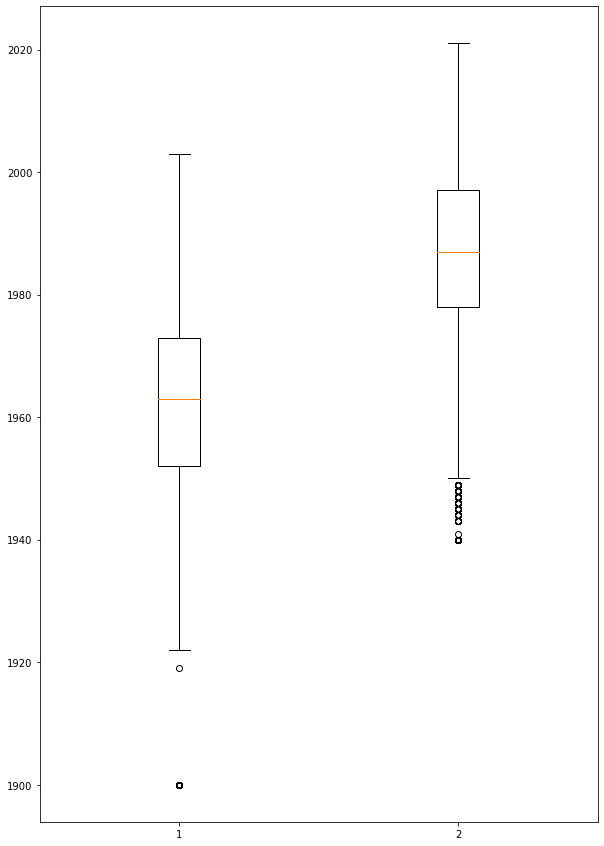

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 15))
plt.boxplot([df['y_birth'], df['y_enter']]) 
plt.show()

- #### 약간 이상치가 보이기는 하지만 크게 문제 될 것이 없다고 생각하고 넘어간다.

In [22]:
df['y_enter'].value_counts()

1979    3512
1978    2589
1992    2558
1996    2368
1995    2264
        ... 
1954      20
1946      15
1944       9
1943       6
1941       1
Name: y_enter, Length: 81, dtype: int64

- #### 입사 연도별 인원수(count)가 높은 순서대로 bar plot을 그려보자.

<AxesSubplot:>

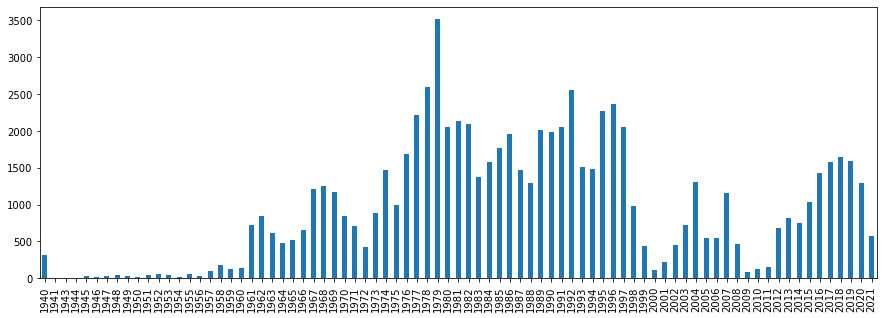

In [23]:
df['y_enter'].value_counts().sort_index().plot(kind='bar',figsize=(15,5))

- #### 그 다음으로 2010년 말 기준 직원 수를 계산해보다.(MZ 세대는 1980년부터 2010년까지 출생한 사람을 의미)

In [24]:
df2010 = df[(df['y_enter'] <=2010)]
df2010s = df2010[(df2010['y_retire'].isnull())|(df2010['y_retire']>2010)]
len(df2010s)

19914

- #### 2010년 당시 직원 수를 구했다면 이제 해당 연도에서 연령을 추가로 만들어 새로운 열에 저장해보자.

In [25]:
df2010s['age'] = 2010 - df2010s['y_birth']
df2010s.head()

C:\Users\katenam\AppData\Local\Temp\ipykernel_16244\2194924542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2010s['age'] = 2010 - df2010s['y_birth']


,y_birth,y_enter,y_retire,sex,age
1,1966.0,1992,NaN,남자,44.0
2,1973.0,1998,NaN,남자,37.0
3,1982.0,2008,NaN,남자,28.0
5,1979.0,2003,NaN,여자,31.0
8,1967.0,1993,NaN,남자,43.0


- #### 남자와 여자로 분리하여 데이터 프레임으로 저장한다. 

In [26]:
df2010_m = df2010s[df2010s['sex']=='남자'].reset_index()
df2010_f = df2010s[df2010s['sex']=='여자'].reset_index()
print(len(df2010_m), len(df2010_f))

16932 2982


- #### 다음으로 연령별 인원수를 계산하고 다시 남성별, 여성별 연령에 따른 인원수를 계산한 테이블을 합쳐준다.

In [27]:
df2010_mp = df2010_m.groupby("age")['index'].count()
df2010_fp = df2010_f.groupby("age")['index'].count()

In [28]:
df2010_mp.head()

age
20.0    10
21.0    12
22.0     8
23.0    10
24.0    10
Name: index, dtype: int64

In [29]:
df2010t = pd.concat([df2010_mp, df2010_fp], axis=1).reset_index()
df2010t.columns = ['연령', '남자','여자']
df2010t

,연령,남자,여자
0,20.0,10,2.0
1,21.0,12,NaN
2,22.0,8,1.0
3,23.0,10,1.0
4,24.0,10,8.0
5,25.0,14,8.0
6,26.0,26,30.0
7,27.0,58,83.0
8,28.0,159,115.0
9,29.0,288,158.0


In [30]:
df2010t = df2010t[df2010t['연령']<=60]

In [31]:
df2020 = df[(df['y_enter'] <=2020)]
df2020s = df2020[(df2020['y_retire'].isnull())|(df2020['y_retire']>2020)]
len(df2020s)

23873

In [32]:

# 2020년도 기준 연령 추가
df2020s['age'] = 2020 - df2020s['y_birth']

# 2020년도 성별 분리
df2020_m = df2020s[df2020s['sex']=='남자'].reset_index()
df2020_f = df2020s[df2020s['sex']=='여자'].reset_index()


# 2020년도 연령별 인원수 계산
df2020_mp = df2020_m.groupby("age")['index'].count()
df2020_fp = df2020_f.groupby("age")['index'].count()

# 성별로 분리된 테이블을 다시 합치고 정년 나이 이후 인원을 제외해주면 완성이다.
# 2020년도 그래프 그리기 위한 테이블 합치기
df2020t = pd.concat([df2020_mp, df2020_fp], axis=1).reset_index()
df2020t.columns = ['연령', '남자','여자']
df2020t = df2020t[df2020t['연령']<=60]
df2020t

C:\Users\katenam\AppData\Local\Temp\ipykernel_16244\613078234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2020s['age'] = 2020 - df2020s['y_birth']


,연령,남자,여자
0,18.0,1,1.0
1,19.0,10,19.0
2,20.0,55,26.0
3,21.0,118,47.0
4,22.0,140,54.0
5,23.0,135,104.0
6,24.0,184,188.0
7,25.0,313,263.0
8,26.0,594,320.0
9,27.0,754,303.0


### 3) 분석 및 예측 방법 결정하기

- #### 2010년과 2020년은 현재 데이터로 추출할 수 있지만, 2030년의 데이터는 존재하지 않는 미래의 데이터이기 때문에 지금까지의 데이터를 활용해서<br/><br/> 2030년을 예측하는 것이 관건이다.
- #### 인구를 예측하는 방식에는 여러 방법이 있지만, 통계청에서 인구 시계열예측을 위해 주로 사용되는 코호트요인법이다.
- #### 코호트요인법은 기본적으로 유입과 유출에 대한 그룹을 세분화하고 각각의 모델을 만들어 예측하는 방식이다. 

#### <span style="background-color:#fff5b1">코호트요인법(corhort component method):</span> 대다수 국가 또는 국제기구에서 적용하고 있는 인구 추계 작성 방법이다. 출생, 사망, 국제 이동 같은 인구 변동<br/><br/> 요인별 미래 수준을 각각 예측한 후 추계의 출발점이되는 기준 인구에 출생하수와 국제순 이동자수는 더하고 사망자수는 빼는 인구 균형 방정식을 적용하여<br/><br/> 다음해 인구를 반복적으로 산출하는 방법이다.

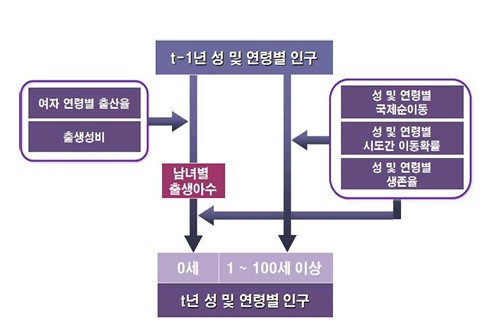

In [33]:
from IPython.display import Image

Image('화면 캡처 2023-12-14 002353.jpg')

- #### 여기서는 시계열 예측 방법 중 가장 간단한 이동평균법으로 계산해보자.
- #### 이동평균법은 차기 예측치를 현시점에서 가까운 n개의 데이터를 평균하여 구하는 방식이다. 

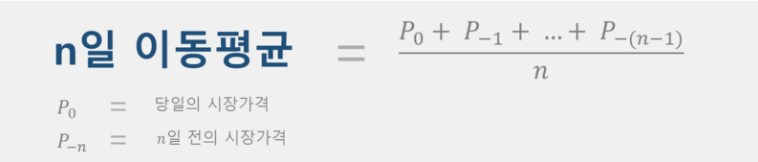

In [34]:
from IPython.display import Image

Image('화면 캡처 2023-12-14 003237.jpg')

- #### 여기서는 특정 연도를 이동평균법으로 예측하기 위해 가까운 5개년 데이터(n=5)를 적용하였다. 즉, 2021년의 연령별 성별 인원을 예측하기 위해서는<br/><br/> 2016년부터 2020년까지의 연령별 성별을 구분한 인원수 테이블이 필요하다.

In [35]:
def extract_year(year) :
  df_year = df[(df['y_enter'] <= year)]
  df_year_s = df_year[(df_year['y_retire'].isnull())|(df_year['y_retire']>year)]
  df_year_s['age'] = year - df_year_s['y_birth']
  df_year_m = df_year_s[df_year_s['sex'] == '남자'].reset_index()
  df_year_f = df_year_s[df_year_s['sex'] == '여자'].reset_index()
  print(f'{year}년 전체 {len(df_year_s)} 명 중 남자 는 {len(df_year_m)} 명, 여자는 {len(df_year_f)} 입니다.')
  df_year_mp = df_year_m.groupby("age")['index'].count().reset_index()
  df_year_mp = df_year_mp.rename(columns={"index": year})
  df_year_fp = df_year_f.groupby("age")['index'].count().reset_index()
  df_year_fp = df_year_fp.rename(columns={"index": year})

  return df_year_mp, df_year_fp

In [37]:
import warnings
warnings.filterwarnings("ignore")

df2016_mp, df2016_fp = extract_year(2016)
df2017_mp, df2017_fp = extract_year(2017)
df2018_mp, df2018_fp = extract_year(2018)
df2019_mp, df2019_fp = extract_year(2019)
df2020_mp, df2020_fp = extract_year(2020)

2016년 전체 21322 명 중 남자 는 17335 명, 여자는 3987 입니다.
2017년 전체 22094 명 중 남자 는 17748 명, 여자는 4346 입니다.
2018년 전체 22816 명 중 남자 는 18165 명, 여자는 4651 입니다.
2019년 전체 23526 명 중 남자 는 18471 명, 여자는 5055 입니다.
2020년 전체 23873 명 중 남자 는 18486 명, 여자는 5387 입니다.


In [38]:
def merge_two_dfs(df1, df2):
    return pd.merge(df1, df2, on='age', how='outer')

In [39]:
dfs_m = [df2016_mp, df2017_mp, df2018_mp, df2019_mp, df2020_mp]

- #### 정년을 60세로 제한하고 60세 이상 인원은 정년최직했다고 가정하여 제외한다.

In [40]:
from functools import reduce

df_years_m = reduce(merge_two_dfs, dfs_m)
df_years_mt = df_years_m[df_years_m['age']<=60]
df_years_mt.head()

,age,2016,2017,2018,2019,2020
0,17.0,12.0,12.0,NaN,NaN,NaN
1,18.0,111.0,111.0,12.0,NaN,1.0
2,19.0,112.0,131.0,111.0,14.0,10.0
3,20.0,121.0,118.0,133.0,114.0,55.0
4,21.0,72.0,122.0,119.0,135.0,118.0


- #### 이제 2021년의 데이터를 이동평균법으로 구해보자. 

In [41]:
df_years_mt[2021] = df_years_mt.iloc[:, 1:6].mean(axis=1).shift(1)
df_years_mt.head()

,age,2016,2017,2018,2019,2020,2021
0,17.0,12.0,12.0,NaN,NaN,NaN,NaN
1,18.0,111.0,111.0,12.0,NaN,1.0,12.00
2,19.0,112.0,131.0,111.0,14.0,10.0,58.75
3,20.0,121.0,118.0,133.0,114.0,55.0,75.60
4,21.0,72.0,122.0,119.0,135.0,118.0,108.20


In [42]:
for i in range(10):
  df_years_mt[2021+i] = df_years_mt.iloc[:, 1+i:6+i].mean(axis=1).round(0).shift(1)

In [43]:
df_years_mt

,age,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,17.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18.0,111.0,111.0,12.0,NaN,1.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.0,112.0,131.0,111.0,14.0,10.0,59.0,34.0,9.0,8.0,8.0,12.0,12.0,NaN,NaN,NaN
3,20.0,121.0,118.0,133.0,114.0,55.0,76.0,65.0,46.0,25.0,24.0,24.0,14.0,10.0,10.0,11.0
4,21.0,72.0,122.0,119.0,135.0,118.0,108.0,99.0,89.0,71.0,53.0,47.0,37.0,27.0,19.0,16.0
5,22.0,129.0,79.0,122.0,121.0,140.0,113.0,120.0,116.0,110.0,97.0,84.0,72.0,59.0,47.0,37.0
6,23.0,93.0,147.0,96.0,146.0,135.0,118.0,115.0,123.0,122.0,120.0,111.0,105.0,96.0,84.0,72.0
7,24.0,112.0,202.0,244.0,163.0,184.0,123.0,128.0,122.0,127.0,123.0,120.0,118.0,116.0,111.0,103.0
8,25.0,225.0,322.0,394.0,441.0,313.0,181.0,183.0,168.0,144.0,137.0,125.0,124.0,122.0,121.0,118.0
9,26.0,303.0,452.0,575.0,616.0,594.0,339.0,330.0,302.0,257.0,198.0,163.0,151.0,140.0,130.0,126.0


In [46]:
dfs_f = [df2016_fp, df2017_fp, df2018_fp, df2019_fp, df2020_fp]
df_years_f = reduce(merge_two_dfs, dfs_f)
df_years_ft = df_years_f[df_years_f['age']<=60]
df_years_ft.head()

,age,2016,2017,2018,2019,2020
0,17.0,3,3,NaN,NaN,NaN
1,18.0,32,38,3.0,2.0,1.0
2,19.0,42,38,38.0,13.0,19.0
3,20.0,27,45,38.0,44.0,26.0
4,21.0,24,28,44.0,43.0,47.0


In [47]:
for i in range(10):
    df_years_ft[2021+i] = df_years_ft.iloc[:, 1+i:6+i].mean(axis=1).round(0).shift(1)
df_years_ft.head()

,age,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,17.0,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18.0,32,38,3.0,2.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.0,42,38,38.0,13.0,19.0,15.0,9.0,2.0,2.0,2.0,3.0,3.0,NaN,NaN,NaN
3,20.0,27,45,38.0,44.0,26.0,30.0,25.0,19.0,12.0,9.0,6.0,4.0,2.0,2.0,3.0
4,21.0,24,28,44.0,43.0,47.0,36.0,37.0,33.0,29.0,22.0,19.0,14.0,10.0,7.0,5.0


In [48]:
df_2030_m = df_years_mt[['age',2030]]
df_2030_f = df_years_ft[['age',2030]]

In [49]:
df2030t = merge_two_dfs(df_2030_m,df_2030_f)
df2030t.columns = ['연령','남자','여자']
df2030t

,연령,남자,여자
0,17.0,NaN,NaN
1,18.0,NaN,NaN
2,19.0,NaN,NaN
3,20.0,11.0,3.0
4,21.0,16.0,5.0
5,22.0,37.0,14.0
6,23.0,72.0,27.0
7,24.0,103.0,37.0
8,25.0,118.0,47.0
9,26.0,126.0,72.0


### 4) 시각화하기
- #### 우리의 목표는 MZ세대를 포함한 회사 세대별 인원 분포와 연도별 추세다.
- #### 버터플라이 차트(butterfly chart)를 사용하여 나타내보다.

In [50]:
c_year = 2010
z_start = 1996
mil_start = 1980
x_start = 1965
baby_start = 1950

In [51]:
font_color = '#525252'
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = df2010t['연령']
column0 = df2010t['남자']
column1 = df2010t['여자']
title0 = 'Male'
title1 = 'Female'

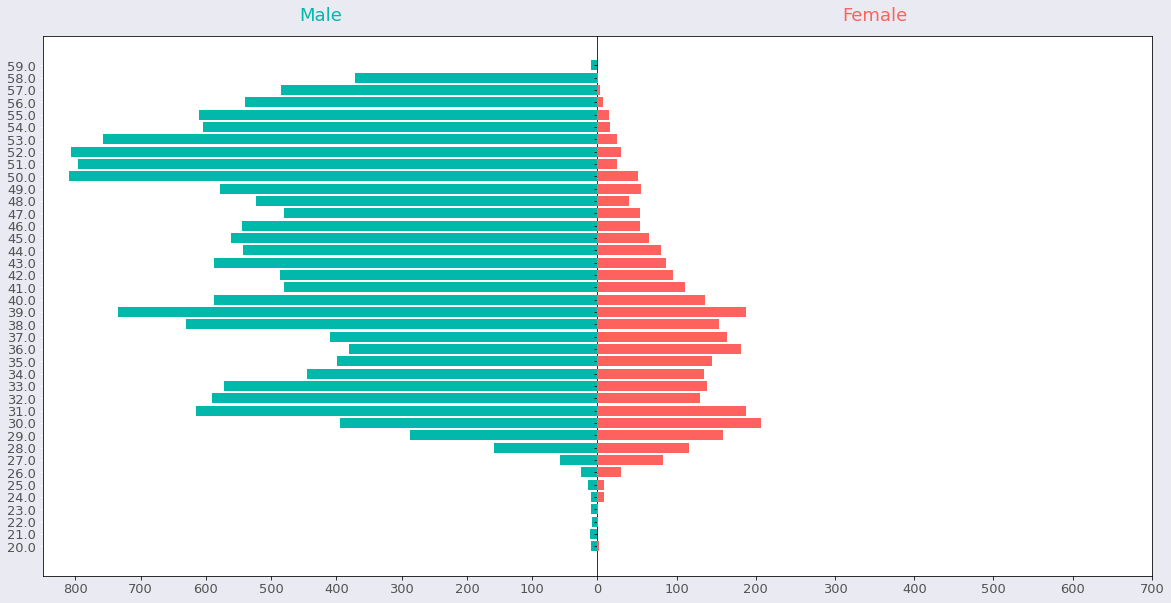

In [52]:
fig, axes = plt.subplots(figsize=(20,10), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[1].barh(index, column1, align='center', color=color_red, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_red)
axes[0].barh(index, column0, align='center', color=color_blue, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_blue)

axes[0].invert_xaxis()
axes[0].set(yticks=index, yticklabels=index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color
axes[1].set_xticks([100, 200, 300, 400, 500, 600, 700])
axes[1].set_xticklabels([100, 200, 300, 400, 500, 600, 700])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
  label.set(fontsize=13, color=font_color)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
  label.set(fontsize=13, color=font_color)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

In [53]:
axes[0].axhspan(20, c_year - mil_start, facecolor='green', alpha=0.2)
axes[0].axhspan(c_year - mil_start, c_year-x_start, facecolor='yellow', alpha=0.2)
axes[0].axhspan(c_year-x_start, 60, facecolor='red', alpha=0.2)
axes[1].axhspan(20, c_year - mil_start, facecolor='green', alpha=0.2)
axes[1].axhspan(c_year - mil_start, c_year-x_start, facecolor='yellow', alpha=0.2)
axes[1].axhspan(c_year-x_start, 60, facecolor='red', alpha=0.2)
axes[1].text(500, 55, r'Baby Boomer', fontsize=15)
axes[1].text(500, 40, r'Generation X', fontsize=15)
axes[1].text(500, 25, r'Millennials', fontsize=15)

Text(500, 25, 'Millennials')

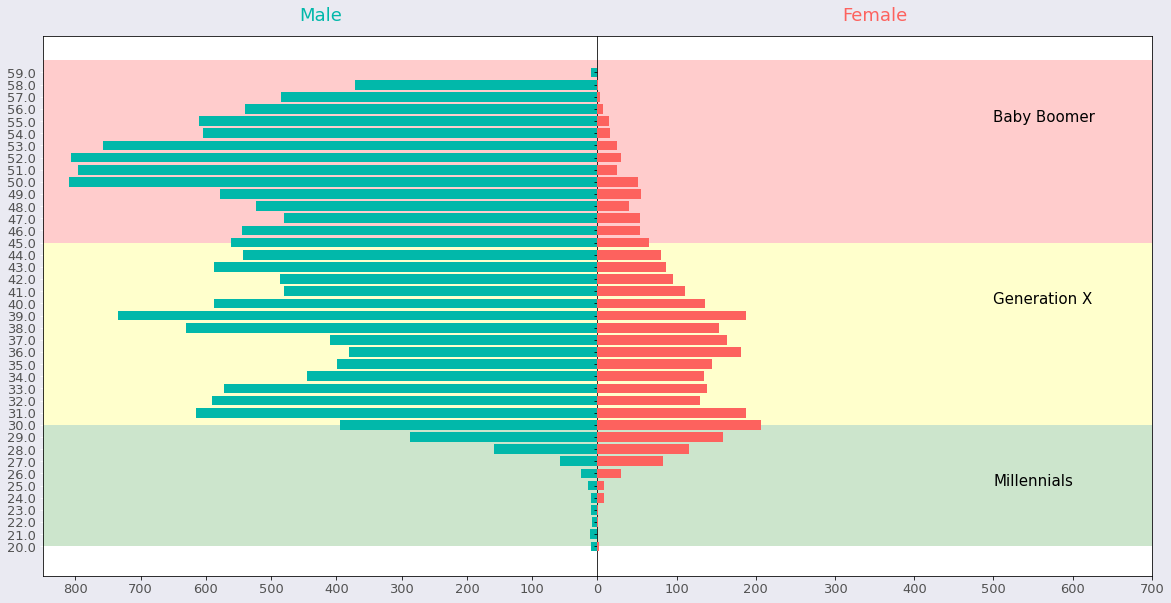

In [54]:
fig, axes = plt.subplots(figsize=(20,10), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[1].barh(index, column1, align='center', color=color_red, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_red)
axes[0].barh(index, column0, align='center', color=color_blue, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_blue)

# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis()

# # To show data from highest to lowest
# plt.gca().invert_yaxis()
axes[0].set(yticks=index, yticklabels=index)

axes[0].yaxis.tick_left()

axes[0].tick_params(axis='y', colors='white') # tick color

axes[1].set_xticks([100, 200, 300, 400, 500, 600, 700])

axes[1].set_xticklabels([100, 200, 300, 400, 500, 600, 700])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
  label.set(fontsize=13, color=font_color)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
  label.set(fontsize=13, color=font_color)

axes[0].axhspan(20, c_year - mil_start, facecolor='green', alpha=0.2)
axes[0].axhspan(c_year - mil_start, c_year-x_start, facecolor='yellow', alpha=0.2)
axes[0].axhspan(c_year-x_start, 60, facecolor='red', alpha=0.2)
axes[1].axhspan(20, c_year - mil_start, facecolor='green', alpha=0.2)
axes[1].axhspan(c_year - mil_start, c_year-x_start, facecolor='yellow', alpha=0.2)
axes[1].axhspan(c_year-x_start, 60, facecolor='red', alpha=0.2)

axes[1].text(500, 55, r'Baby Boomer', fontsize=15)
axes[1].text(500, 40, r'Generation X', fontsize=15)
axes[1].text(500, 25, r'Millennials', fontsize=15)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

In [55]:
c_year = 2020
font_color = '#525252'
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = df2020t['연령']
column0 = df2020t['남자']
column1 = df2020t['여자']
title0 = 'Male'
title1 = 'Female'

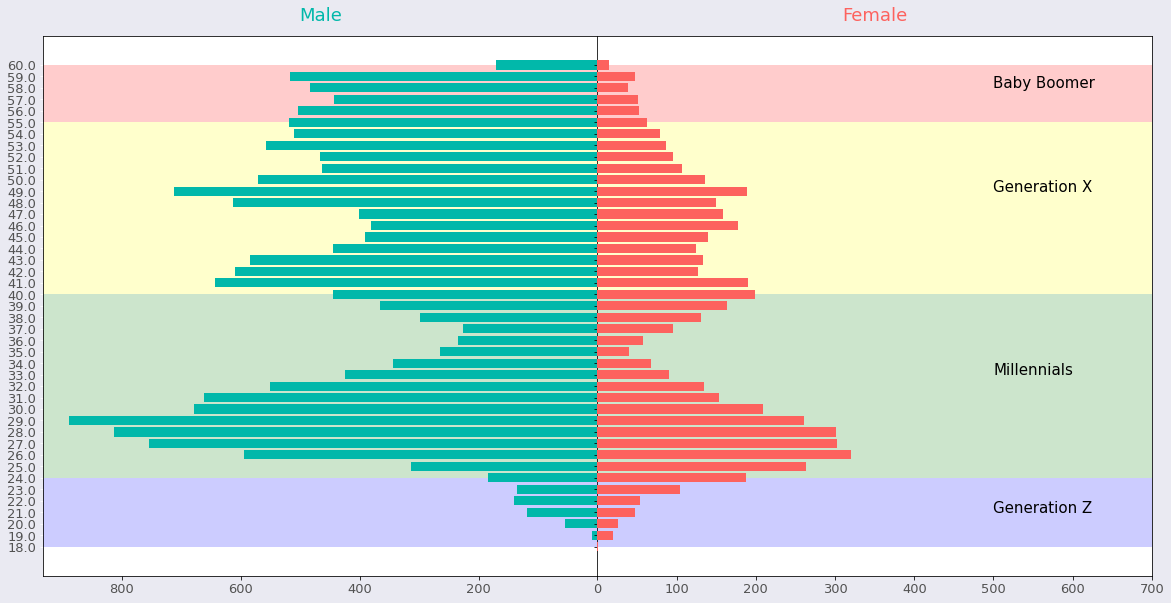

In [56]:
fig, axes = plt.subplots(figsize=(20,10), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[1].barh(index, column1, align='center', color=color_red, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_red)
axes[0].barh(index, column0, align='center', color=color_blue, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_blue)

# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis()

# # To show data from highest to lowest
# plt.gca().invert_yaxis()
axes[0].set(yticks=index, yticklabels=index)

axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color

axes[1].set_xticks([100, 200, 300, 400, 500, 600, 700])

axes[1].set_xticklabels([100, 200, 300, 400, 500, 600, 700])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
  label.set(fontsize=13, color=font_color)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
  label.set(fontsize=13, color=font_color)

axes[0].axhspan(18, c_year - z_start, facecolor='blue', alpha=0.2)
axes[0].axhspan(c_year - z_start, c_year - mil_start, facecolor='green', alpha=0.2)
axes[0].axhspan(c_year - mil_start, c_year-x_start, facecolor='yellow', alpha=0.2)
axes[0].axhspan(c_year-x_start, 60, facecolor='red', alpha=0.2)
axes[1].axhspan(18, c_year - z_start, facecolor='blue', alpha=0.2)
axes[1].axhspan(c_year - z_start, c_year - mil_start, facecolor='green', alpha=0.2)
axes[1].axhspan(c_year - mil_start, c_year-x_start, facecolor='yellow', alpha=0.2)
axes[1].axhspan(c_year-x_start, 60, facecolor='red', alpha=0.2)

axes[1].text(500, 58, r'Baby Boomer', fontsize=15)
axes[1].text(500, 49, r'Generation X', fontsize=15)
axes[1].text(500, 33, r'Millennials', fontsize=15)
axes[1].text(500, 21, r'Generation Z', fontsize=15)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

In [57]:
c_year = 2030
font_color = '#525252'
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = df_2030_m['age']
column0 = df_2030_m[2030]
column1 = df_2030_f[2030]
title0 = 'Male'
title1 = 'Female'

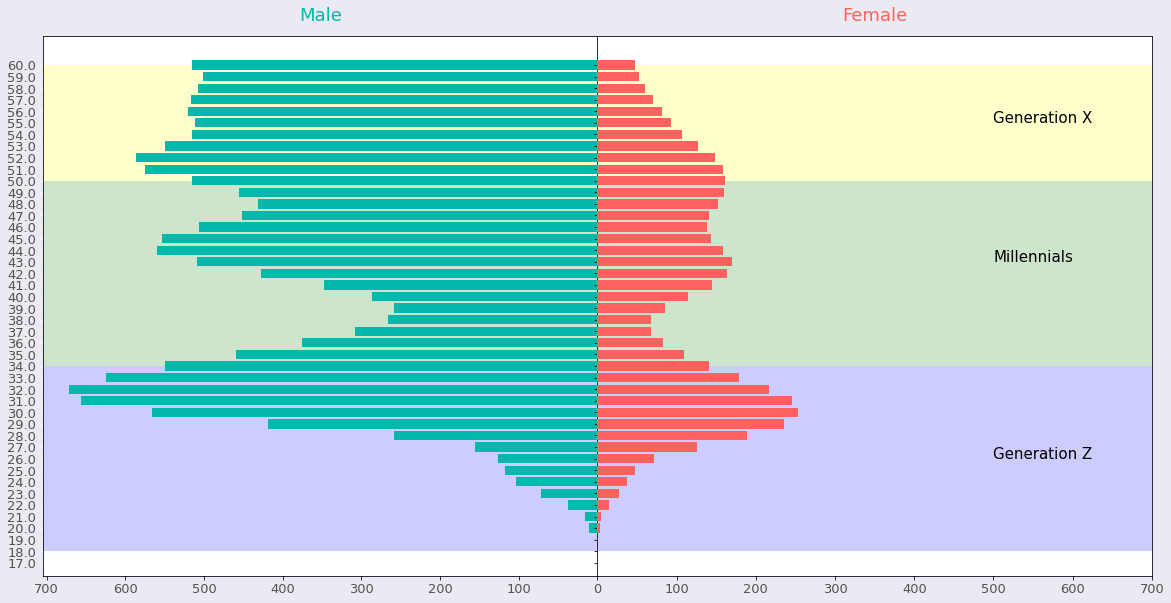

In [58]:
fig, axes = plt.subplots(figsize=(20,10), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[1].barh(index, column1, align='center', color=color_red, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_red)
axes[0].barh(index, column0, align='center', color=color_blue, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_blue)

# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis()

# # To show data from highest to lowest
# plt.gca().invert_yaxis()
axes[0].set(yticks=index, yticklabels=index)

axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color

axes[1].set_xticks([100, 200, 300, 400, 500, 600, 700])

axes[1].set_xticklabels([100, 200, 300, 400, 500, 600, 700])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
  label.set(fontsize=13, color=font_color)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
  label.set(fontsize=13, color=font_color)

axes[0].axhspan(18, c_year - z_start, facecolor='blue', alpha=0.2)
axes[0].axhspan(c_year - z_start, c_year - mil_start, facecolor='green', alpha=0.2)
axes[0].axhspan(c_year - mil_start, 60, facecolor='yellow', alpha=0.2)
# axes[0].axhspan(c_year-x_start, 60, facecolor='red', alpha=0.2)
axes[1].axhspan(18, c_year - z_start, facecolor='blue', alpha=0.2)
axes[1].axhspan(c_year - z_start, c_year - mil_start, facecolor='green', alpha=0.2)
axes[1].axhspan(c_year - mil_start, 60, facecolor='yellow', alpha=0.2)
# axes[1].axhspan(c_year-x_start, 60, facecolor='red', alpha=0.2)

# axes[1].text(500, 58, r'Baby Boomer', fontsize=15)
axes[1].text(500, 55, r'Generation X', fontsize=15)
axes[1].text(500, 43, r'Millennials', fontsize=15)
axes[1].text(500, 26, r'Generation Z', fontsize=15)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)